In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

# Data Exploration

This assignment is to predict the values of the sale price by applying regression models
*   analysis the correlation of features, choose the features with correlation index larger than 0.2
*   dealing with categorical data
*   dealing with missing data

In [2]:
# DATA: House Price Prediction

df = pd.read_csv('data.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Correlation and HeatMap

<ipython-input-5-44fb4e893a96>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


Text(171.72222222222234, 0.5, 'Features')

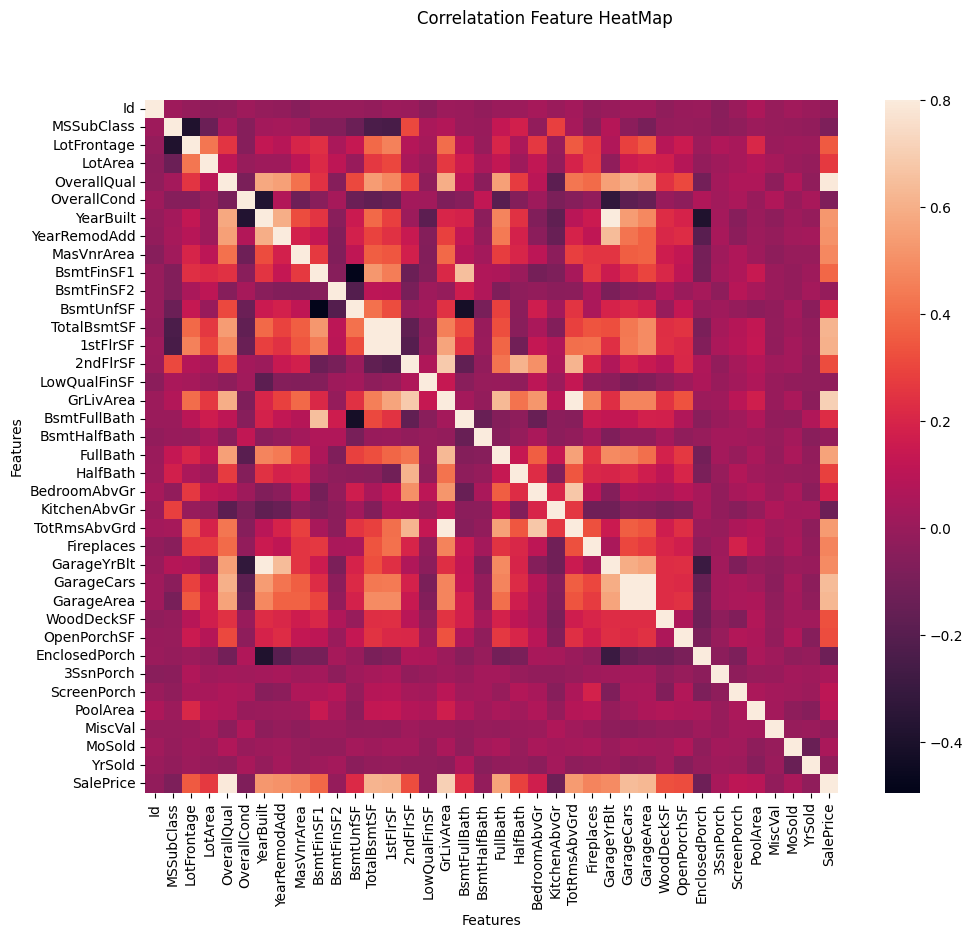

In [5]:
#correlation matrix
corr_mat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_mat, vmax=0.8,square=True)

plt.suptitle("Correlatation Feature HeatMap")
plt.xlabel("Features")
plt.ylabel("Features")

<ipython-input-6-8f9f2f37c5f9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


Text(109.75, 0.5, 'Features')

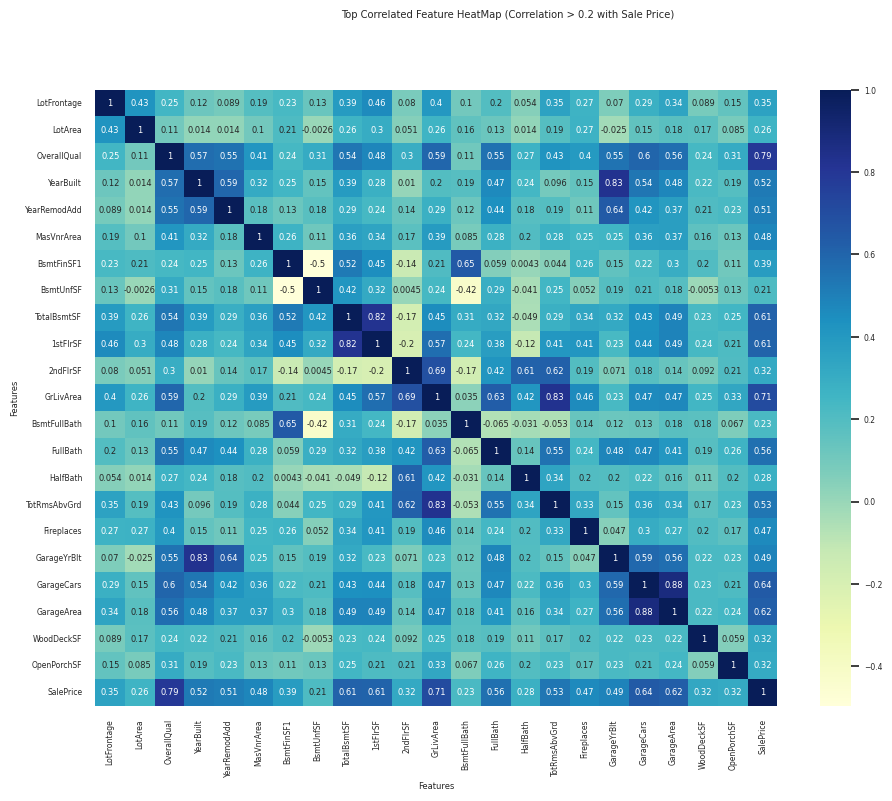

In [6]:
# most correlated features
corr_mat = df.corr()

sns.set(font_scale = 0.5)
plt.figure(figsize = (11,8))

top_corr = corr_mat.index[abs(corr_mat["SalePrice"])>0.2]
g = sns.heatmap(df[top_corr].corr(),annot=True,cmap="YlGnBu")
plt.suptitle("Top Correlated Feature HeatMap (Correlation > 0.2 with Sale Price)")
plt.xlabel("Features")
plt.ylabel("Features")

In [7]:
print("Correlation Values")

corr = df.corr().drop('SalePrice')
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Correlation Values
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dt

<ipython-input-7-41c857ffe614>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().drop('SalePrice')


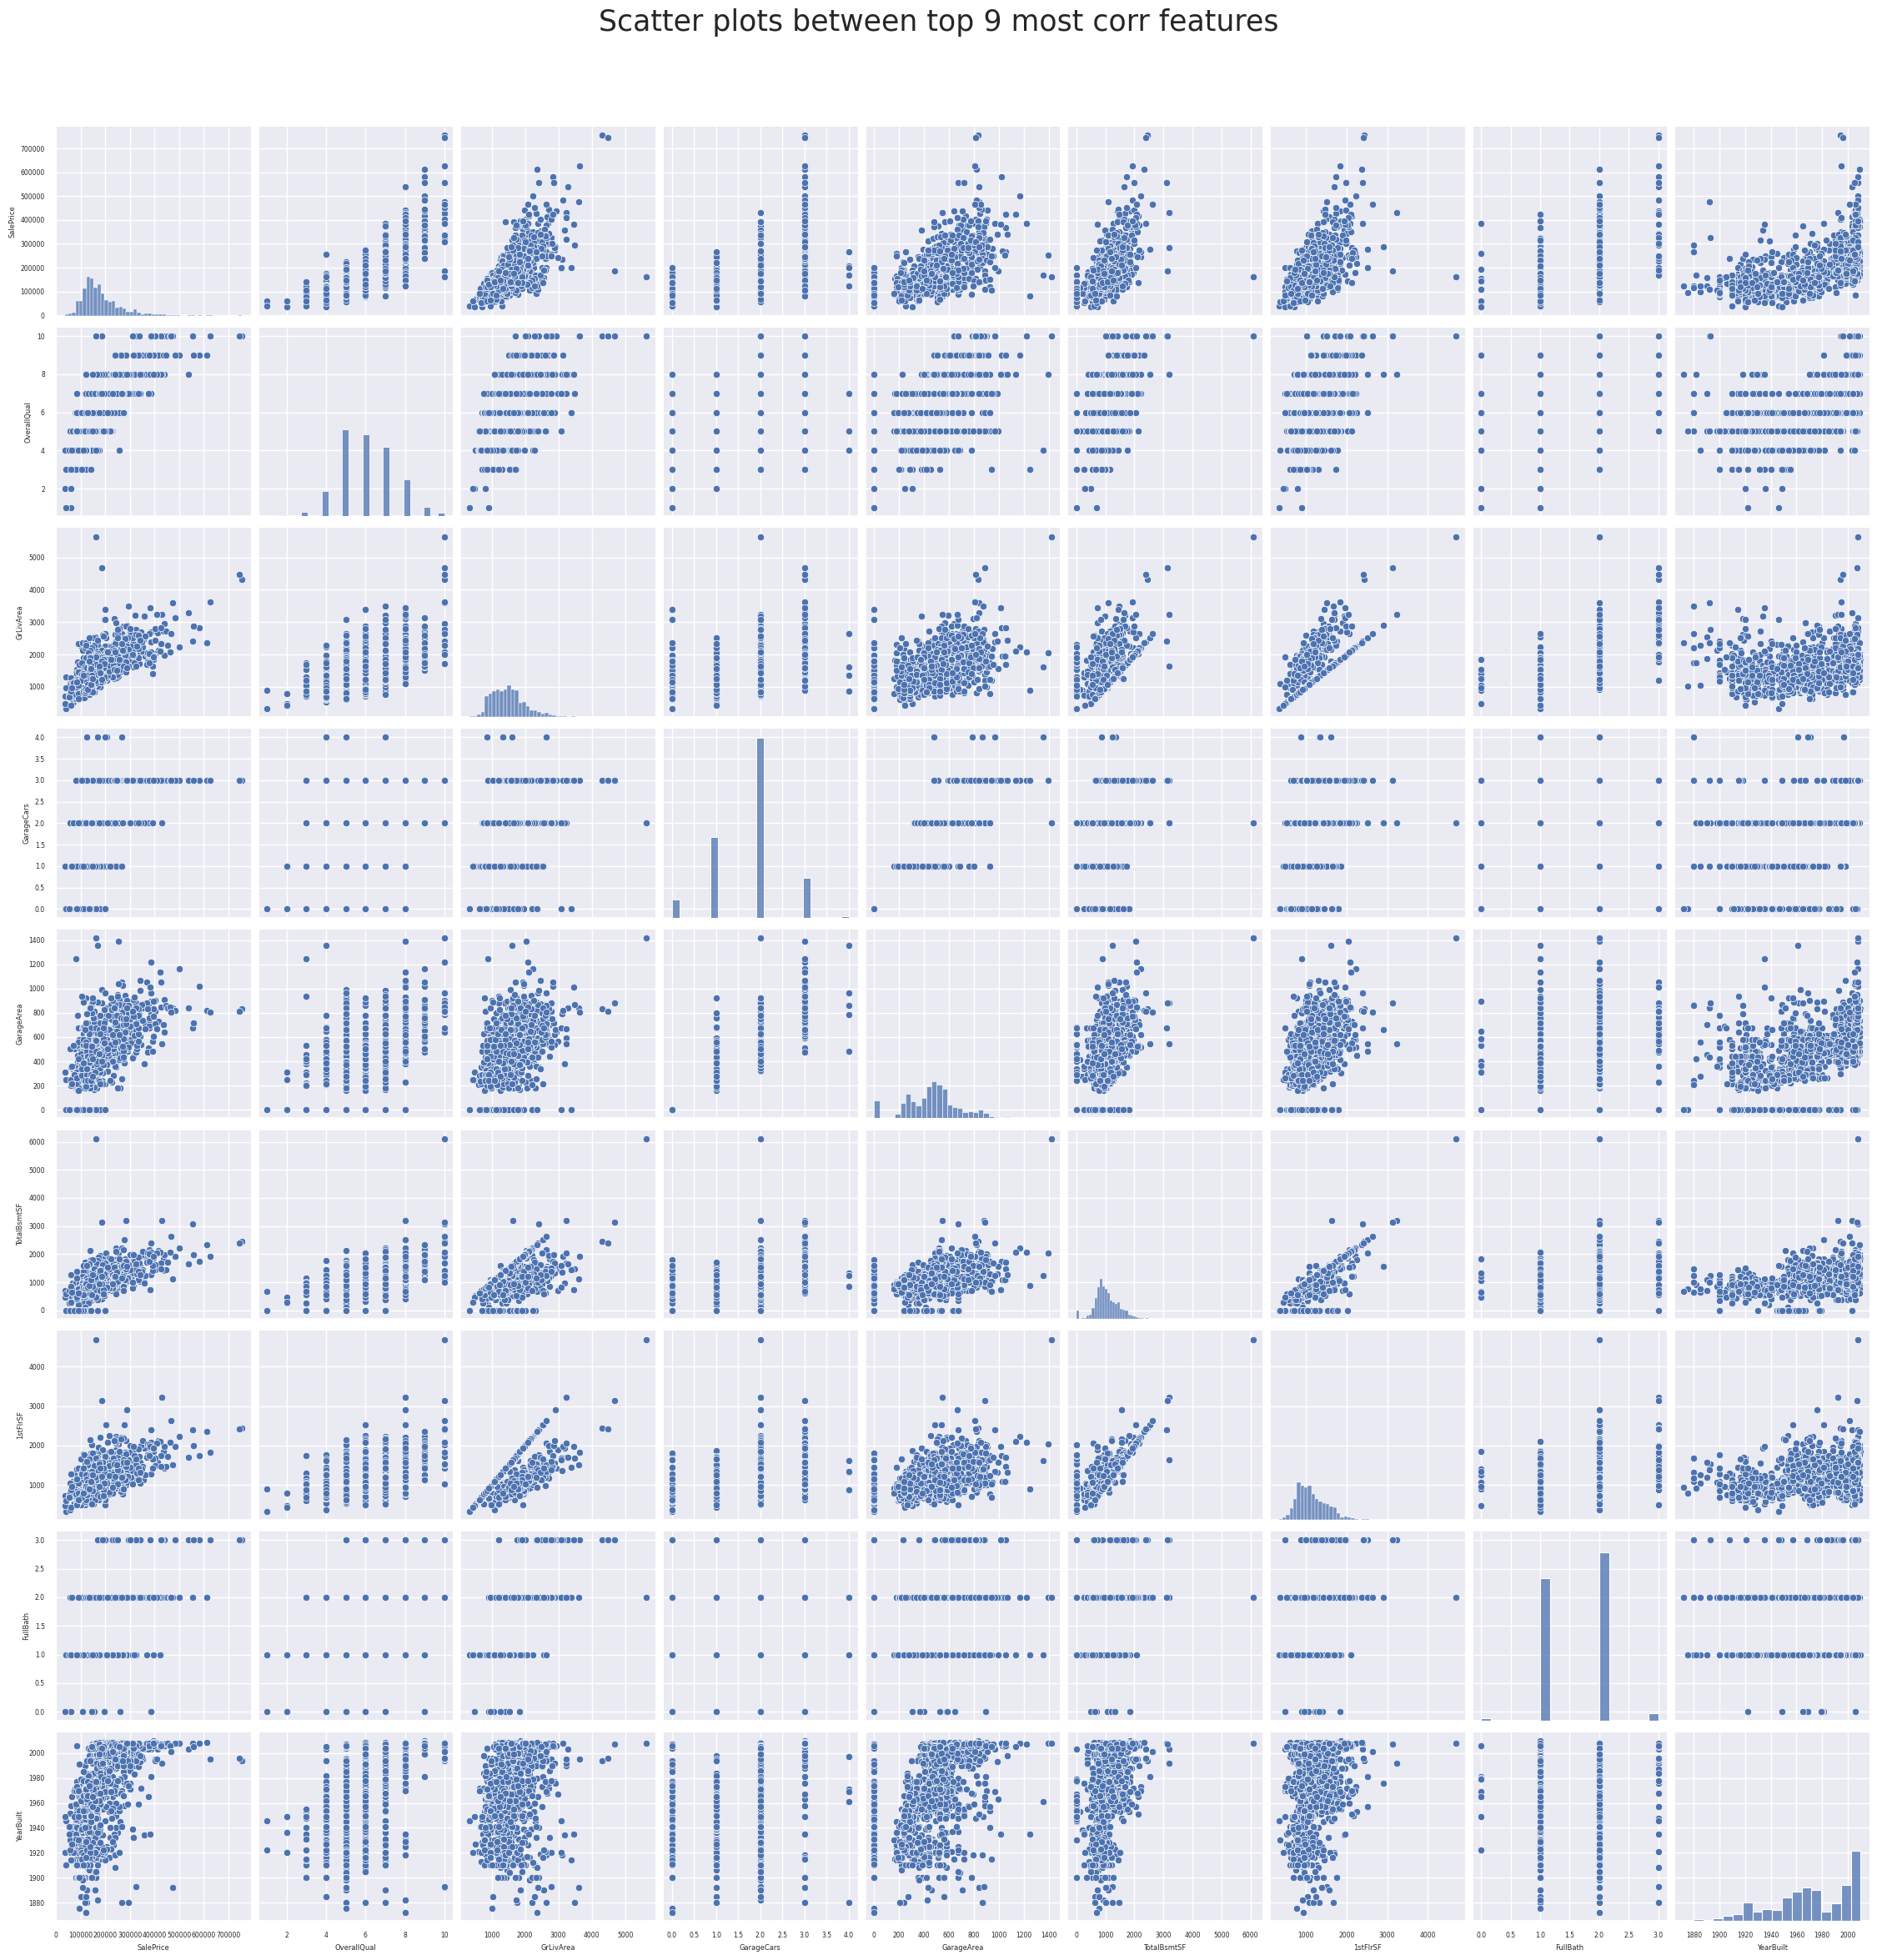

In [8]:
rcParams['figure.figsize'] = 5,5
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','YearBuilt']
sns_plot = sns.pairplot(df[cols])

plt.suptitle('Scatter plots between top 9 most corr features', y=1.04, size=25)
plt.tight_layout()
plt.show()

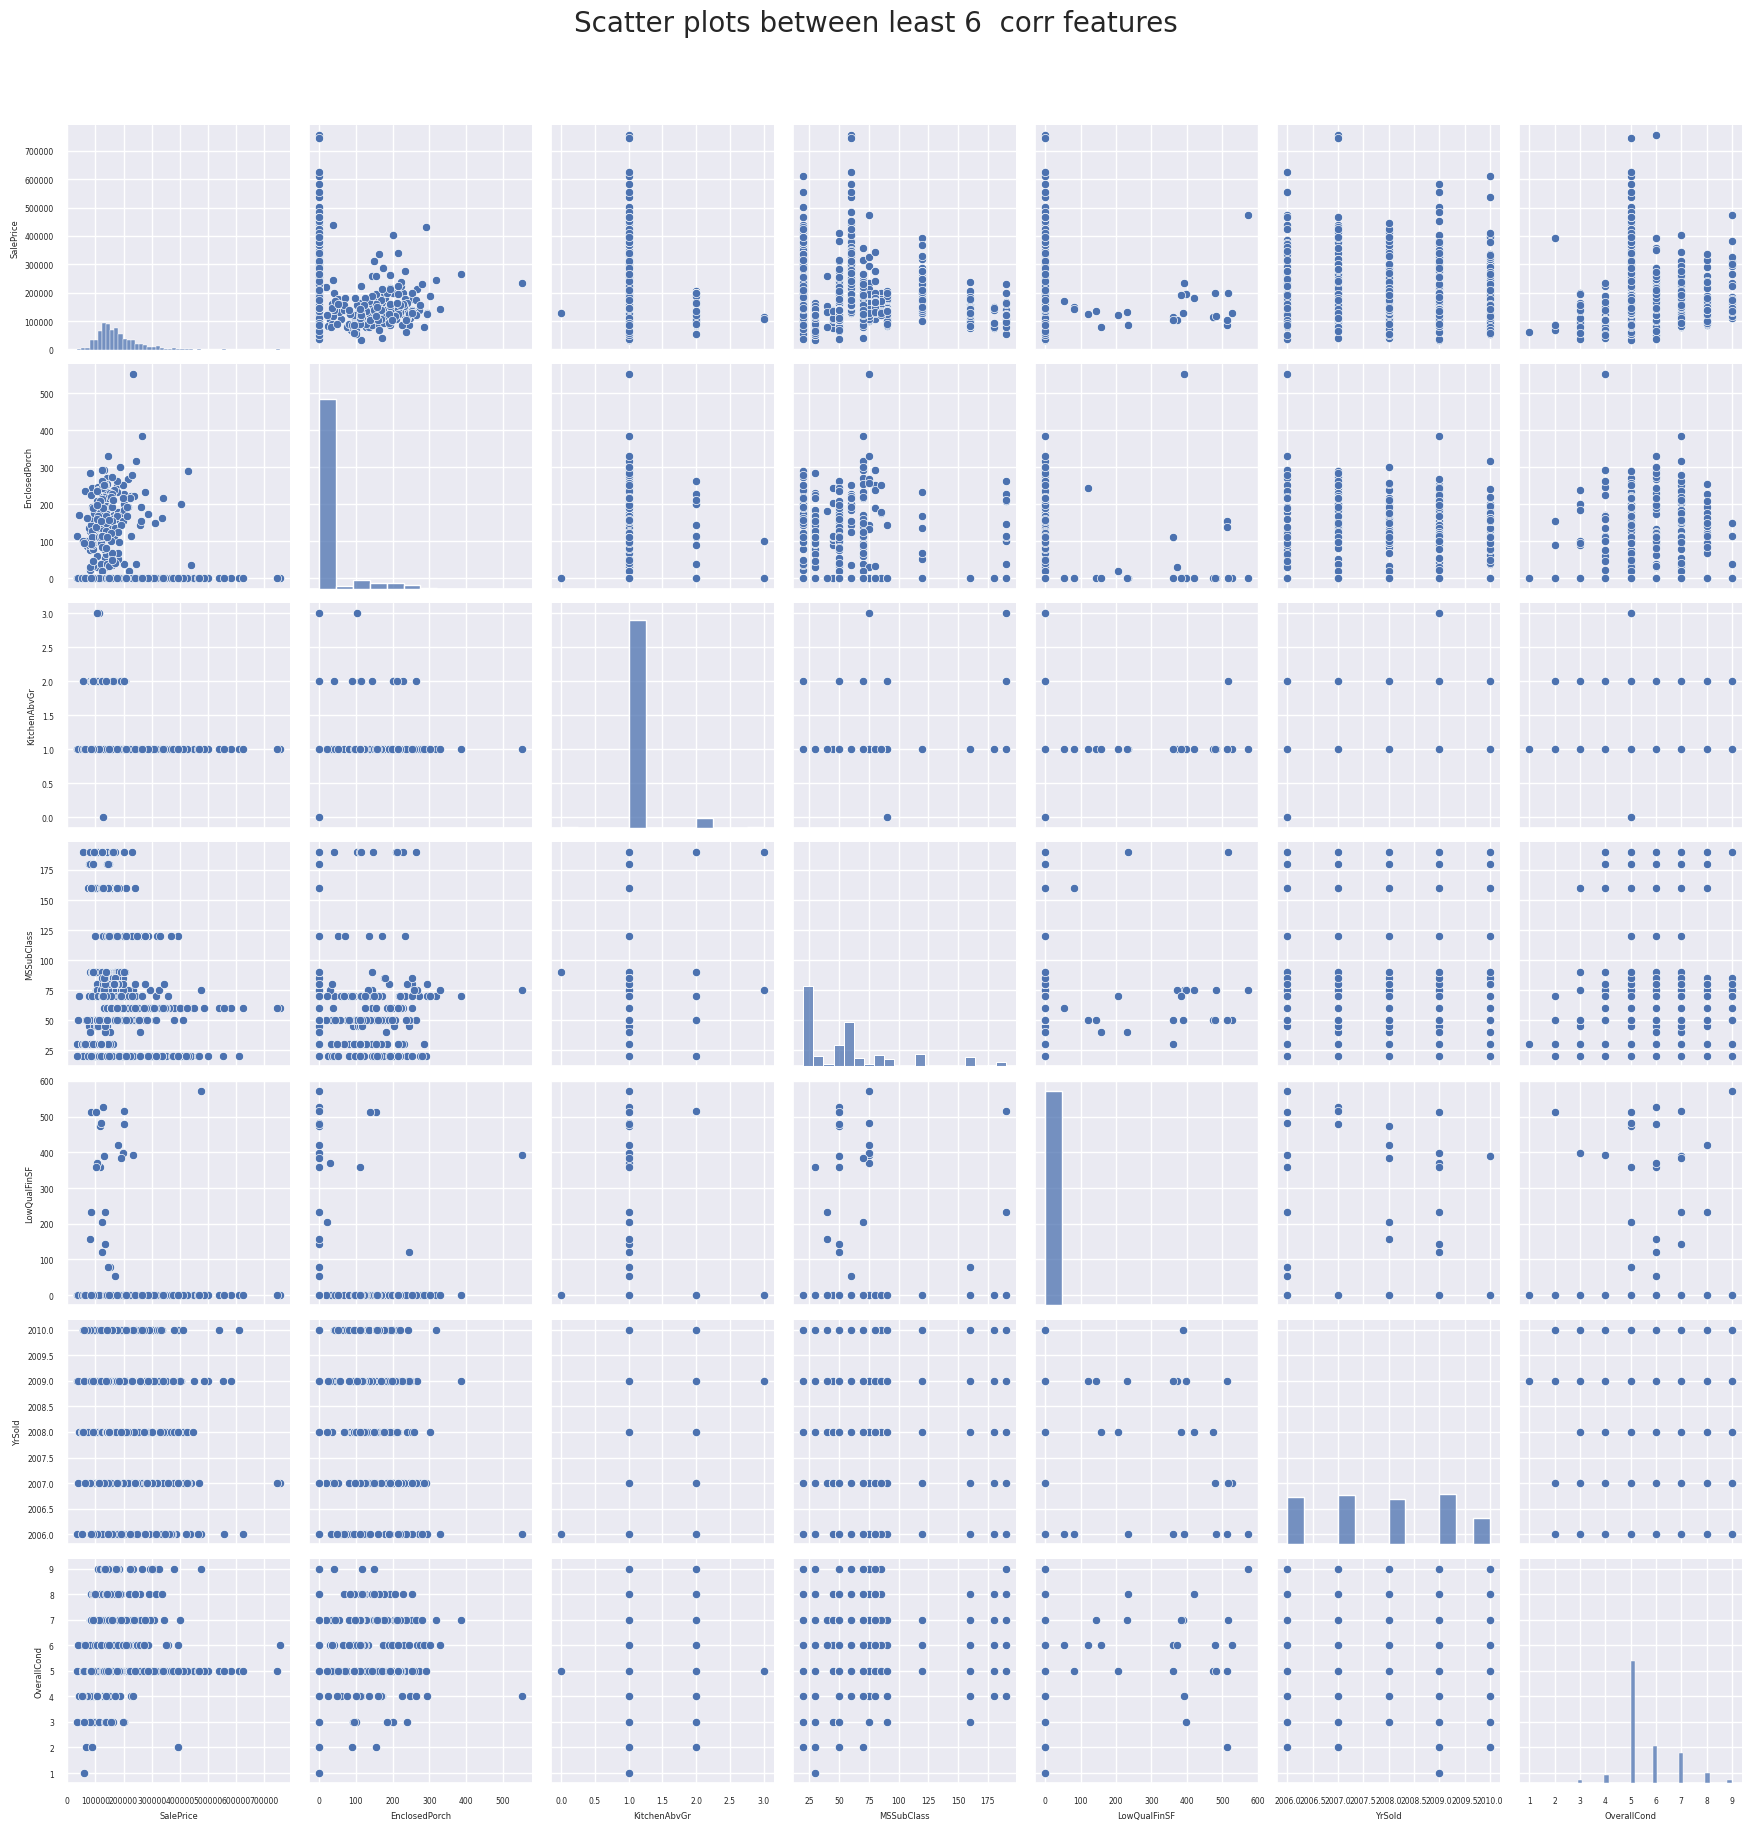

In [9]:
rcParams['figure.figsize'] = 5,5
cols = ['SalePrice','EnclosedPorch', 'KitchenAbvGr', 'MSSubClass', 'LowQualFinSF','YrSold', 'OverallCond']
sns_plot = sns.pairplot(df[cols])

plt.suptitle('Scatter plots between least 6  corr features', y=1.04, size=20)
plt.tight_layout()
plt.show()

## Data Cleaning

Pleas see: https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-Missing-Data-Categorical-Data.php

## Handling Outliers

<Figure size 1200x1200 with 0 Axes>

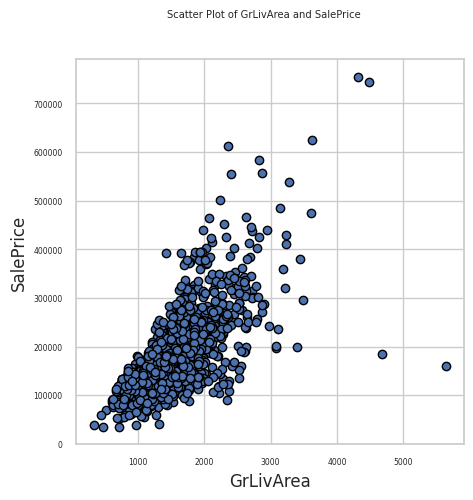

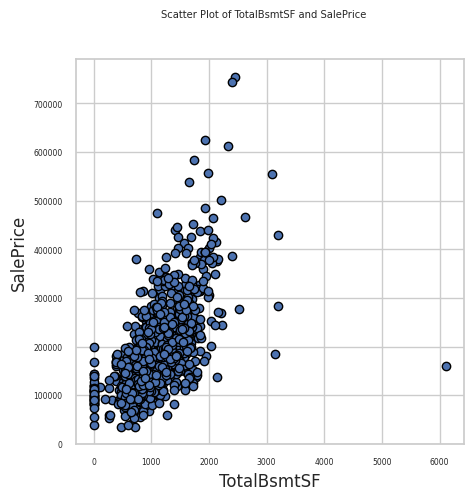

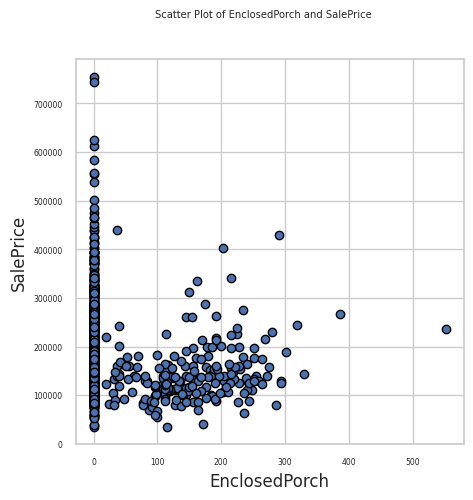

In [10]:
sns.set_style('whitegrid')
edgecolor = 'black'

fig = plt.figure(figsize=(12,12))

#function to plot scatter plot between a feature and the Sale Price
def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = df[a], y = df['SalePrice'], edgecolor=edgecolor)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Scatter Plot of "+ a + " and SalePrice")
    plt.show()

scatter_plot('GrLivArea')
scatter_plot('TotalBsmtSF')
scatter_plot('EnclosedPorch')


In [11]:
#Deleting GrLivArea outliers
df =  df.drop( df[( df['GrLivArea'] > 4000) & ( df['SalePrice']<300000)].index)

#Deleting TotalBsmtSF outliers
df =  df.drop( df[( df['TotalBsmtSF'] > 4000) ].index)

#Deleting EnclosedPorch outliers
df =  df.drop( df[( df['EnclosedPorch']>400)].index)

#Deleting outliers
df =  df.drop( df[( df['SalePrice']>700000)].index)

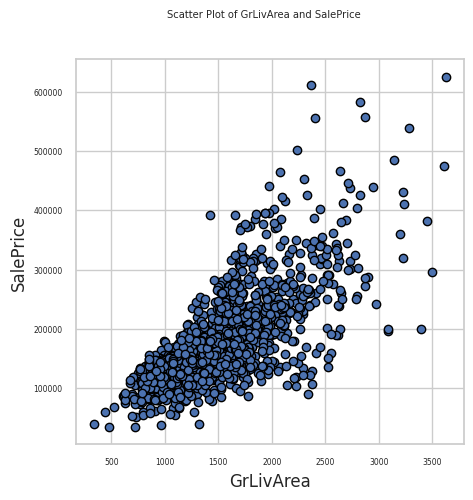

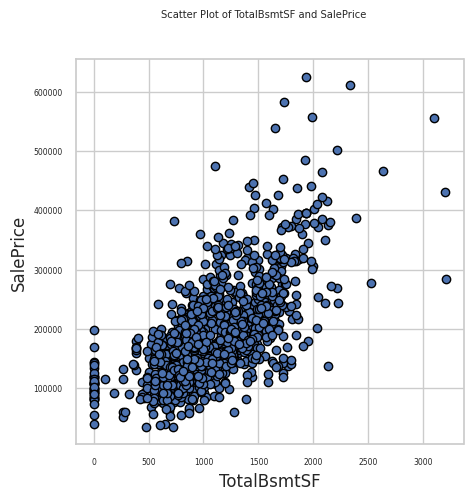

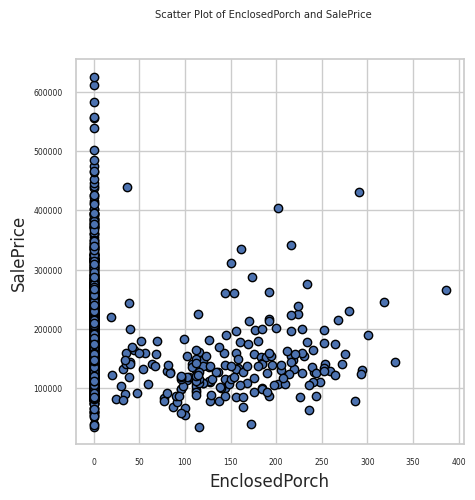

In [12]:
scatter_plot('GrLivArea')
scatter_plot('TotalBsmtSF')
scatter_plot('EnclosedPorch')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

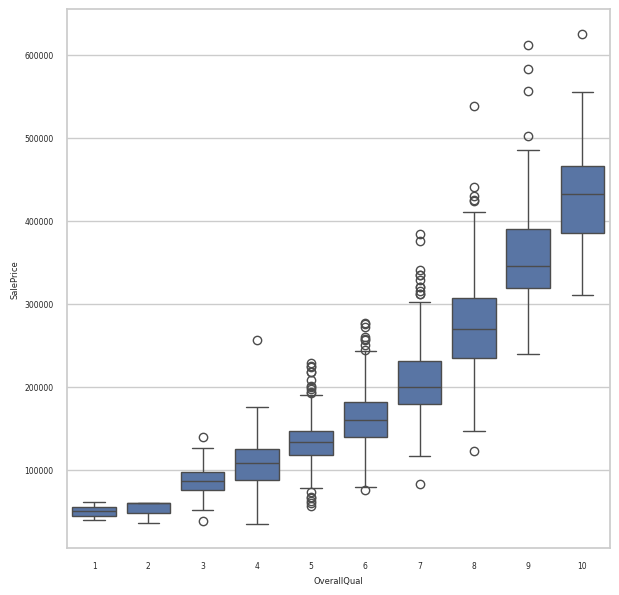

In [13]:
# plot a box plot for categorical feature : Overall Quality

fig = plt.figure(figsize=(7,7))
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
sns.boxplot(x = df['OverallQual'], y="SalePrice", data = data)

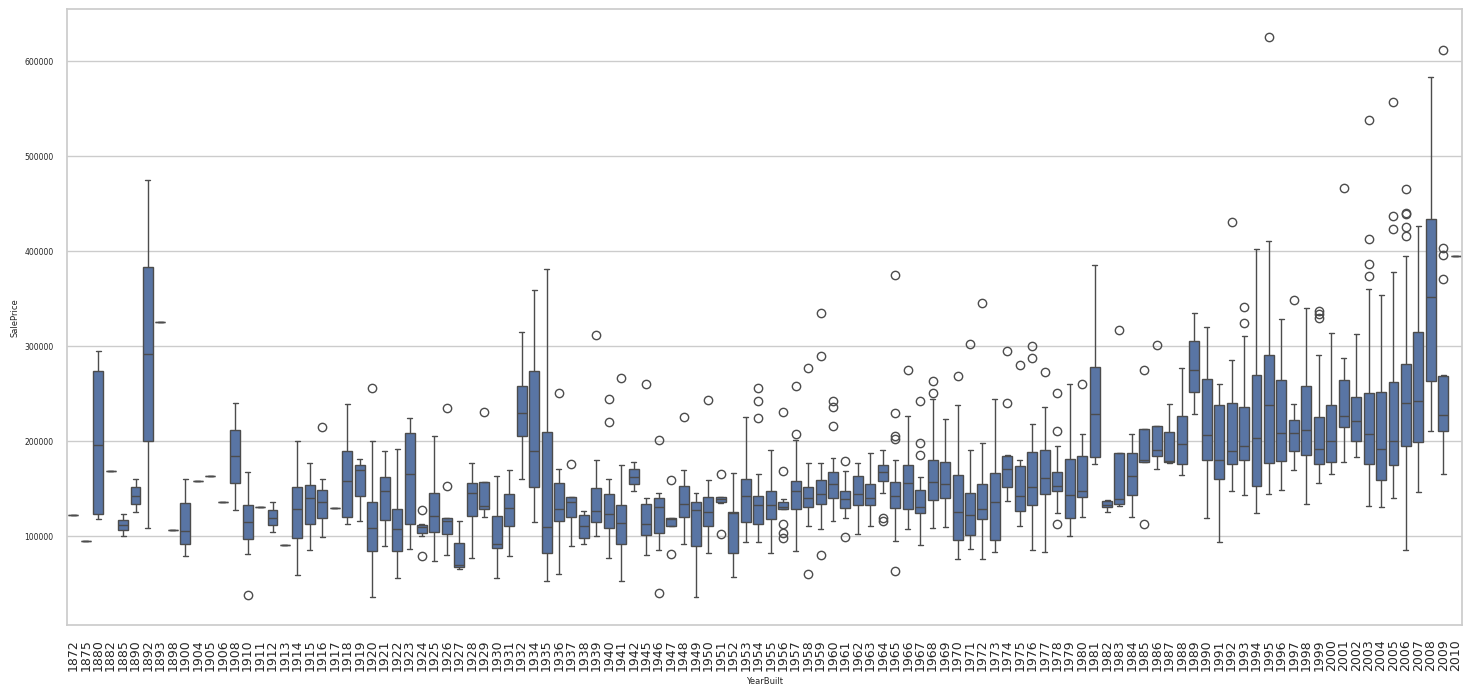

In [14]:
# Create a figure with a specific size
fig = plt.figure(figsize=(18, 8))

# Concatenating 'SalePrice' and 'YearBuilt' columns for plotting
data = pd.concat([df['SalePrice'], df['YearBuilt']], axis=1)

# Creating a box plot
sns.boxplot(x='YearBuilt', y="SalePrice", data=data)

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=90, fontsize=9)

# Display the plot
plt.show()


### Missing Data (finding and replacing)

In [15]:
#function to see the missing data in a dataframe
def missing_data(df,n):
    total = df.isnull().sum().sort_values(ascending=False)          # Total No of missing values
    percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)*100  # % of Missing values
    No_unique_val = df.nunique()                                   # No of unique values
    missing_data = pd.concat([total, percentage, No_unique_val], axis=1,
                             keys=['Total No of missing val', '% of Missing val','No of unique val'], sort = False)

    print(missing_data.head(n))

In [16]:
#training data
missing_data(df,50)

               Total No of missing val  % of Missing val  No of unique val
PoolQC                            1451         99.725086                 2
MiscFeature                       1401         96.288660                 4
Alley                             1364         93.745704                 2
Fence                             1176         80.824742                 4
FireplaceQu                        690         47.422680                 5
LotFrontage                        259         17.800687               109
GarageYrBlt                         81          5.567010                97
GarageCond                          81          5.567010                 5
GarageType                          81          5.567010                 6
GarageFinish                        81          5.567010                 3
GarageQual                          81          5.567010                 5
BsmtFinType2                        38          2.611684                 6
BsmtExposure             

In [17]:
# drop theses columns due to large null values or many same values
df = df.drop(['Utilities','PoolQC','MiscFeature','Alley', 'Id', 'Neighborhood', 'LotFrontage'], axis=1)

# Null value likely means No Fence so fill as "None"
df["Fence"] = df["Fence"].fillna("None")

# Null value likely means No Fireplace so fill as "None"
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

# Null value likely means  typical(Typ)
df["Functional"] = df["Functional"].fillna("Typ")

# Only one null value so fill as the most frequent value(mode)
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

# Only one null value so fill as the most frequent value(mode)
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

# Very few null value so fill with the most frequent value(mode)
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

# Null value likely means no masonry veneer
df["MasVnrType"] = df["MasVnrType"].fillna("None") #so fill as "None" (since categorical feature)
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)      #so fill as o

# Only one null value so fill as the most frequent value(mode)
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

#MSZoning is general zoning classification,Very few null value so fill with the most frequent value(mode)
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

#Null value likely means no Identified type of dwelling so fill as "None"
df['MSSubClass'] = df['MSSubClass'].fillna("None")

# Null value likely means No Garage, so fill as "None" (since these are categorical features)
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

# Null value likely means No Garage and no cars in garage, so fill as 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

# Null value likely means No Basement, so fill as 0
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

# Null value likely means No Basement, so fill as "None" (since these are categorical features)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')


In [18]:
# calculate total number of null values in training data
null_df = df.isnull().sum().sum()
print(null_df)

0


In [19]:
print("Correlation Values")

corr = df.corr().drop('SalePrice')
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Correlation Values
OverallQual      0.800849
GrLivArea        0.721650
GarageCars       0.649237
TotalBsmtSF      0.646454
GarageArea       0.636835
1stFlrSF         0.625139
FullBath         0.558876
TotRmsAbvGrd     0.537259
YearBuilt        0.536813
YearRemodAdd     0.521408
MasVnrArea       0.474069
Fireplaces       0.466607
BsmtFinSF1       0.395572
OpenPorchSF      0.330671
WoodDeckSF       0.323026
2ndFlrSF         0.296762
HalfBath         0.283404
LotArea          0.269381
GarageYrBlt      0.268327
BsmtFullBath     0.235291
BsmtUnfSF        0.221263
BedroomAbvGr     0.159992
ScreenPorch      0.118481
MoSold           0.057443
3SsnPorch        0.047480
PoolArea         0.027797
BsmtFinSF2      -0.009322
MiscVal         -0.021057
YrSold          -0.023040
LowQualFinSF    -0.029911
BsmtHalfBath    -0.038961
OverallCond     -0.079575
MSSubClass      -0.088392
EnclosedPorch   -0.137655
KitchenAbvGr    -0.138771
Name: SalePrice, dtype: float64


<ipython-input-19-41c857ffe614>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().drop('SalePrice')


### Categorical Data (removing or replacing them)

In [20]:
df = pd.get_dummies(df)

In [21]:
print("Correlation Values")

corr = df.corr().drop('SalePrice')
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Correlation Values
OverallQual         0.800849
GrLivArea           0.721650
GarageCars          0.649237
TotalBsmtSF         0.646454
GarageArea          0.636835
                      ...   
GarageFinish_Unf   -0.418699
BsmtQual_TA        -0.461571
FireplaceQu_None   -0.480314
KitchenQual_TA     -0.529023
ExterQual_TA       -0.599272
Name: SalePrice, Length: 261, dtype: float64


Text(173.2500000000001, 0.5, 'Features')

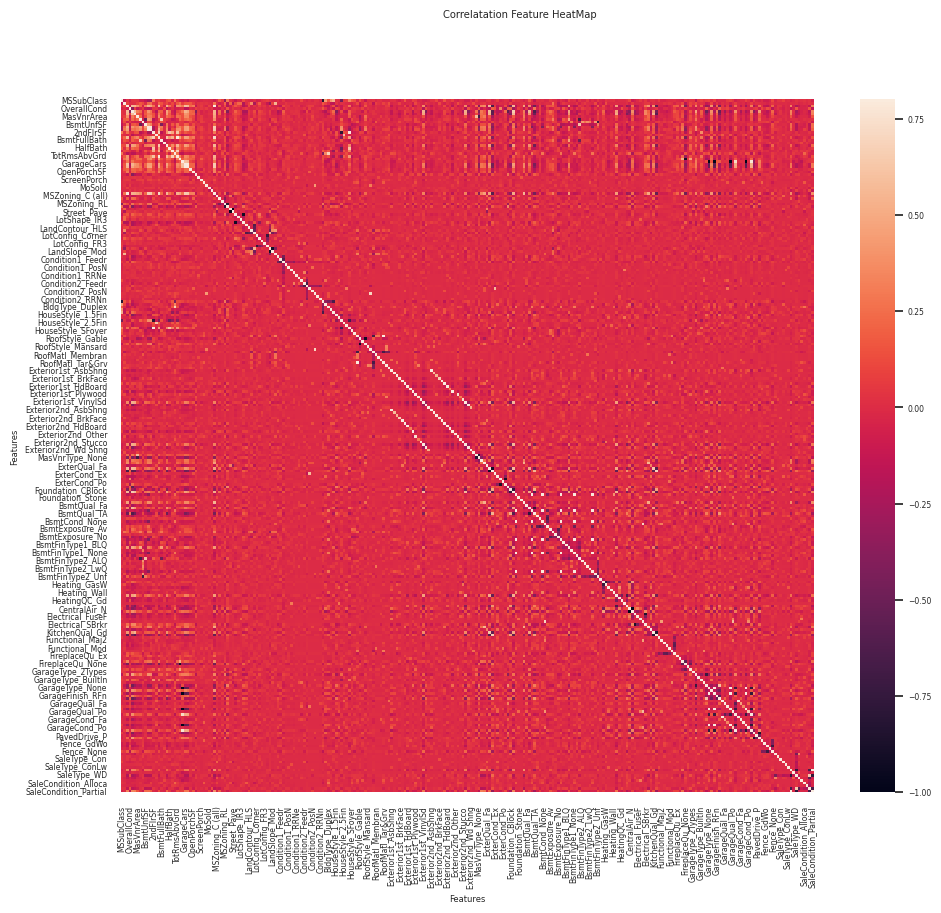

In [22]:
#correlation matrix
corr_mat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_mat, vmax=0.8,square=True)

plt.suptitle("Correlatation Feature HeatMap")
plt.xlabel("Features")
plt.ylabel("Features")

Text(109.75, 0.5, 'Features')

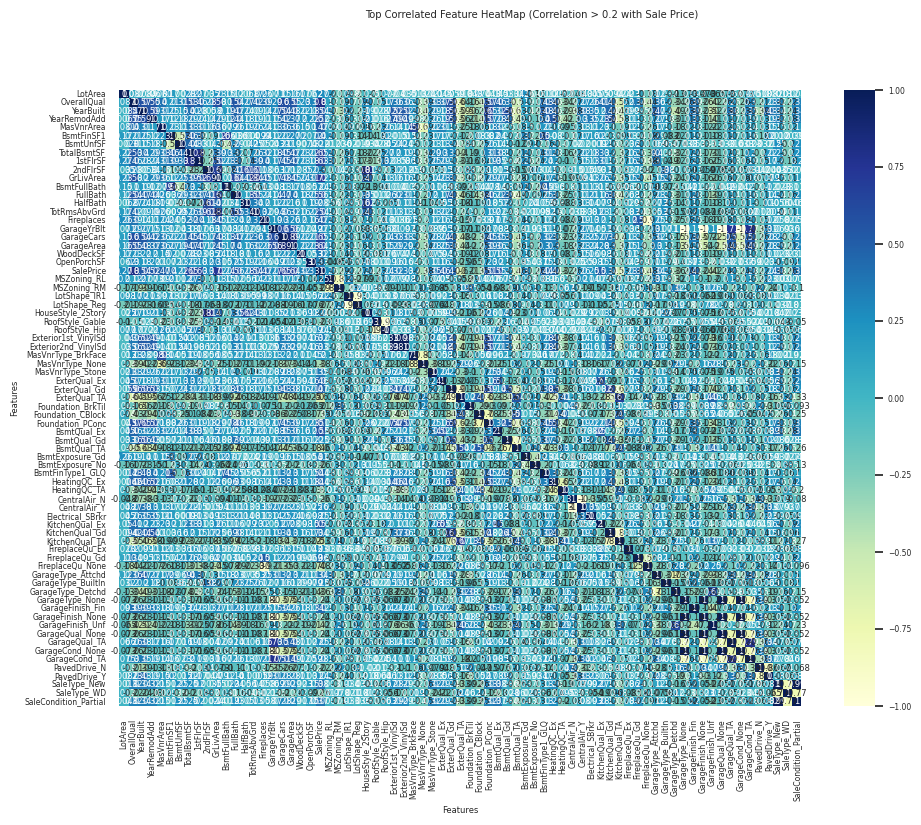

In [23]:
# most correlated features
corr_mat = df.corr()

sns.set(font_scale = 0.5)
plt.figure(figsize = (11,8))

top_corr = corr_mat.index[abs(corr_mat["SalePrice"])>0.2]
g = sns.heatmap(df[top_corr].corr(),annot=True,cmap="YlGnBu")
plt.suptitle("Top Correlated Feature HeatMap (Correlation > 0.2 with Sale Price)")
plt.xlabel("Features")
plt.ylabel("Features")

# Linear Regression

Please answer the following questions:

1. what is linear regression?

  **Answer**: Linear Regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. The goal is to find a linear equation that best fits the data, so we can predict the value of the dependent variable (in this case, SalePrice) based on the values of the independent variables.

  

2. why we choose the linear regression model?

  Linear regression is chosen in this context because:

  a. Simplicity: It’s straightforward to implement and interpret.

  b. Predictive Power: It can effectively predict outcomes, especially when relationships between variables are linear.

  c. Basis for Comparison: It serves as a good starting point for regression analysis, allowing for comparisons with more complex models later on.

In [24]:
# data preperation (split ...)
from sklearn.model_selection import train_test_split

corr_matrix = df.corr().abs()

# Define a threshold for selecting the highly correlated features
threshold = 0.2

# Find the columns that meet the threshold with SalePrice
# We use the target variable 'SalePrice' to find correlations
high_corr_columns = corr_matrix[corr_matrix['SalePrice'] > threshold].index

# Drop the target variable 'SalePrice' from the feature set
high_corr_columns = high_corr_columns.drop('SalePrice')

# Create the feature set with high correlation to the target variable
X = df[high_corr_columns]


# X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Linear Regression
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 824221764.2697769
R^2 Score: 0.87939492258546


3.   what are scaling techniques?

Scaling techniques are methods used to standardize the range of independent variables or features in machine learning algorithms. The goal of scaling is to ensure that no single feature dominates the others in terms of its range of values, which can lead to biased or skewed results in algorithms that are sensitive to feature magnitude, particularly those that employ distance calculations.

Two common scaling techniques are:

  1. **Min-Max Scaling (Normalization)**: This technique scales the data to a fixed range, typically 0 to 1. The cost of having this bounded range is that we will end up with smaller standard deviations, which can suppress the effect of outliers.


  2. **Standard Scaling (Standardization)**: This technique transforms the data to have a mean of zero and a standard deviation of one. It's not bounded as Min-Max Scaling is, making it less sensitive to outliers.

In my scenario, when using these two scaling methods to train the linear regression model, I don't see much difference in performance in terms of R² because linear regression is not sensitive to the variance in the data (i.e., scaling doesn't affect the fit). However, it can affect the interpretation of the coefficients since their scale will be different.

In my experiment, I observed positive R² scores in both cases, which suggests the model has predictive capabilities consistent with the unscaled data. It implies that, at least for this dataset, scaling did not negatively impact the model's ability to fit the data and predict the target variable, even if it changed the scale of the input features.


Using two scaling method to train the linear regression again.\
Comment on the differences (if any) in the results.

In [26]:
# Create a pipeline with MinMaxScaler and LinearRegression
pipeline = Pipeline([
    ('minmax_scaler', MinMaxScaler()),  # Normalization step
    ('linear_regression', LinearRegression())  # Linear regression model
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Results After Normalization")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Results After Normalization
Mean Squared Error: 824221764.2697803
R^2 Score: 0.8793949225854596


In [27]:
from sklearn.preprocessing import StandardScaler

# Create a pipeline with StandardScaler and LinearRegression
pipeline = Pipeline([
    ('standard_scaler', StandardScaler()),  # Standardization step
    ('linear_regression', LinearRegression())  # Linear regression model
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Results After Standardization")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Results After Standardization
Mean Squared Error: 824221764.2697802
R^2 Score: 0.8793949225854596


# Logistic Regression

Please answer the following questions:

1. what is logistic regression?

  Logistic Regression is a statistical method used for binary classification problems. It models the probability of a binary response based on one or more predictor variables. Unlike linear regression, which predicts a continuous outcome, logistic regression predicts a binary outcome (e.g., yes/no, win/lose, pass/fail). It works by applying a logistic function to a linear equation, which ensures that the output lies in the range between 0 and 1, making it suitable for estimating probabilities.


2. why we use the logistic regression model?

  Logistic regression is used for the following reasons:

  a. Binary Classification: Our project involves classifying houses into two categories based on sale price. If the sale price is less than 200,000 - label 0, otherwise - label 1. Logistic regression is specifically designed for binary classification tasks like this.

  b. Probabilistic Understanding: Logistic regression will provide not just the classifications but also the probabilities of a house belonging to each category. This is useful for understanding the level of certainty in each prediction and could provide insights into the factors influencing house prices.

  c. Feature Effect Interpretation: The coefficients in logistic regression can give insights into how different features (like size, location, amenities) affect the likelihood of a house being in a higher price category. This is beneficial for understanding the housing market.

  d. Model Simplicity and Efficiency: Logistic regression models are relatively simple and efficient to train. This can be advantageous if you need to quickly develop a model or work with limited computational resources.

  Be. aseline Model: Starting with logistic regression can establish a baseline performance for the classification task. If this model’s performance is unsatisfactory, you can then explore more complex models with a reference point for improvement.

Please assume: if the sale price is less than 200,000 - label 0, otherwise - label 1.

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

# Assuming df is your original DataFrame and 'SalePrice' is your target column
# Step 1: Create a new binary target variable
df['SalePrice_Label'] = (df['SalePrice'] >= 200000).astype(int)

# Step 3: Split the data into training and test sets
X = df.drop(['SalePrice', 'SalePrice_Label'], axis=1)
y = df['SalePrice_Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Create a pipeline with a scaler and a logistic regression model
pipeline = Pipeline([
    ('logistic_regression', LogisticRegression())  # Logistic regression model
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9176201372997712
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       315
           1       0.86      0.84      0.85       122

    accuracy                           0.92       437
   macro avg       0.90      0.89      0.90       437
weighted avg       0.92      0.92      0.92       437



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Create a pipeline with a scaler and a logistic regression model
pipeline = Pipeline([
    ('minmax_scaler', MinMaxScaler()),  # Normalization step
    ('logistic_regression', LogisticRegression())  # Logistic regression model
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9107551487414187
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       315
           1       0.85      0.82      0.84       122

    accuracy                           0.91       437
   macro avg       0.89      0.88      0.89       437
weighted avg       0.91      0.91      0.91       437



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
# Create a pipeline with a scaler and a logistic regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalization step
    ('logistic_regression', LogisticRegression())  # Logistic regression model
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9176201372997712
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       315
           1       0.86      0.84      0.85       122

    accuracy                           0.92       437
   macro avg       0.90      0.89      0.90       437
weighted avg       0.92      0.92      0.92       437

